<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/NLP_Model_On_Twitter_US_Airline_Sentiment_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

from textblob import TextBlob

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/Tweets.csv.zip')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [ ]:
df['airline_sentiment_gold'].value_counts()

,count
airline_sentiment_gold,
negative,32
positive,5
neutral,3


In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['airline_sentiment'])

In [ ]:
df['char_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x:len(x.split()))
df['avg_word_length'] = df['char_length']/(df['word_count']+1)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,char_length,word_count,avg_word_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1,35,4,7.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2,72,9,7.200000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1,71,12,5.461538
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,126,17,7.000000
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,55,10,5.000000


In [ ]:
df['polarity'] = df['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,char_length,word_count,avg_word_length,polarity
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1,35,4,7.000000,0.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2,72,9,7.200000,0.000000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1,71,12,5.461538,-0.390625
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,126,17,7.000000,0.006250
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,55,10,5.000000,-0.350000


In [ ]:
df['hashtag_count'] = df['text'].apply(lambda x:x.count('#'))
df['mention_count'] = df['text'].apply(lambda x:x.count('@'))
df['exclamation_count'] = df['text'].apply(lambda x:x.count('!'))

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_location,user_timezone,sentiment,char_length,word_count,avg_word_length,polarity,hashtag_count,mention_count,exclamation_count
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,Eastern Time (US & Canada),1,35,4,7.000000,0.000000,0,2,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),2,72,9,7.200000,0.000000,0,1,0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,Lets Play,Central Time (US & Canada),1,71,12,5.461538,-0.390625,0,1,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),0,126,17,7.000000,0.006250,0,1,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),0,55,10,5.000000,-0.350000,0,1,0


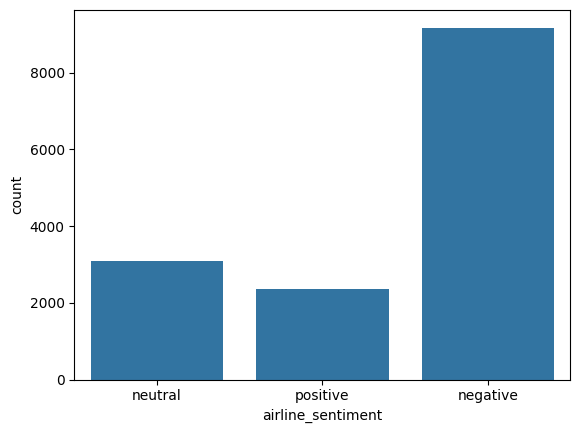

In [ ]:
sns.countplot(x='airline_sentiment', data=df)
plt.show()

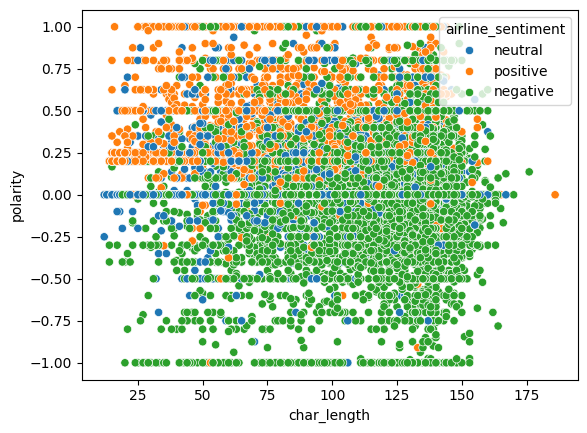

In [ ]:
sns.scatterplot(x='char_length', y='polarity', hue='airline_sentiment', data=df)
plt.show()

In [ ]:
fig = px.scatter_3d(
    df.sample(2000),
    x='char_length',
    y='word_count',
    z = 'polarity',
    color = 'airline_sentiment',

)
fig.show()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = text.lower()
  text = re.sub(r'http\S+','',text)
  text = re.sub(r'@\w+','',text)
  text = re.sub(r'\d+','',text)

  text = text.translate(str.maketrans('', '', string.punctuation))
  tokens = word_tokenize(text)


  tokens = [
      lemmatizer.lemmatize(word)
      for word in tokens
      if word not in stop_words and len(word)>0
  ]

  return " ".join(tokens)

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

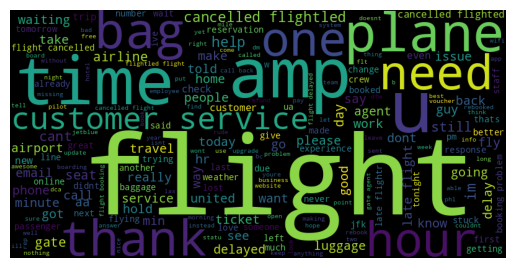

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=400).generate("".join(df['clean_text']))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
bow = CountVectorizer(max_features=6000, ngram_range=(1,2))
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = lr.predict(X_test_tfidf)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)

print(classification_report(y_test, lr.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1889
           1       0.67      0.48      0.56       580
           2       0.81      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

print(classification_report(y_test, nb.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1889
           1       0.72      0.21      0.33       580
           2       0.88      0.34      0.49       459

    accuracy                           0.73      2928
   macro avg       0.77      0.51      0.55      2928
weighted avg       0.75      0.73      0.68      2928



In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

print(classification_report(y_test, svm.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.63      0.53      0.58       580
           2       0.76      0.68      0.72       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [ ]:
voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=2000)),
        ('nb', MultinomialNB()),
        ('svm', LinearSVC())
    ],
    voting='hard'
)

voting.fit(X_train_tfidf, y_train)

print(classification_report(y_test, voting.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1889
           1       0.69      0.46      0.55       580
           2       0.82      0.60      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.67      0.71      2928
weighted avg       0.79      0.80      0.78      2928



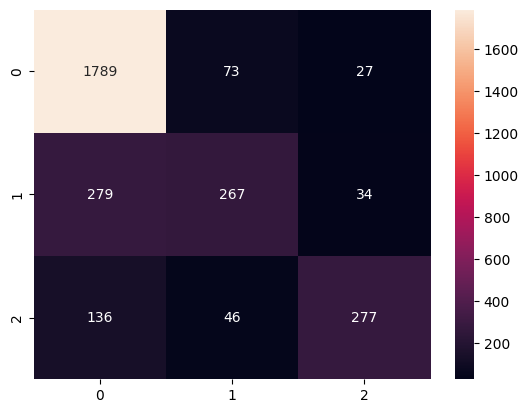

In [ ]:
cm = confusion_matrix(y_test, voting.predict(X_test_tfidf))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=6000)),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=2000)),
            ('nb', MultinomialNB()),
            ('svm', LinearSVC())
        ]
    ))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=6000)),
                ('model',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=2000)),
                                              ('nb', MultinomialNB()),
                                              ('svm', LinearSVC())]))])

In [ ]:
param_grid = {
    'tfidf__max_features':[4000,6000],
    'model__lr__C':[0.5,1,5]
}

grid = GridSearchCV(pipeline, param_grid, cv=3)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'model__lr__C': 5, 'tfidf__max_features': 4000}
